<a href="https://colab.research.google.com/github/Haxxanali012/DataScienceAnalytics/blob/main/CEP_DS%26A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: ZOHAIB SATHIO (20sw036)**

**NAME: FARHAN ALI (20sw072)**

**NAME: M HASSAN (20sw012)**

# **CEP: Heart Disease Prediction**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set_style("darkgrid", {'axes.grid' : False})


In [5]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## **Preprocess** **Data**

**Missing** **values**

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Exploratory Data Analysis**

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
df['output'].value_counts(normalize=True)*100

1    54.455446
0    45.544554
Name: output, dtype: float64

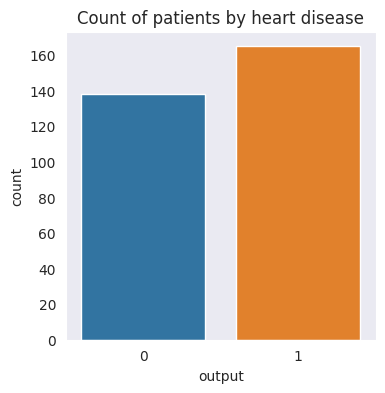

In [10]:
plt.figure(figsize=(4,4))
sns.countplot(x='output', data=df)
plt.title('Count of patients by heart disease')
plt.show()

In [11]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

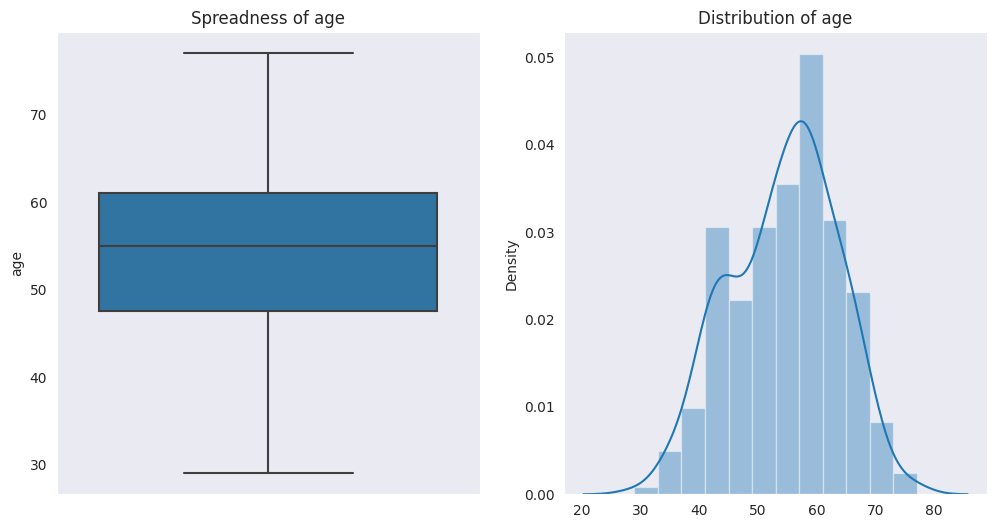

In [12]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(y=df['age'])
plt.title('Spreadness of age')

plt.subplot(1,2,2)
sns.distplot(x=df['age'])
plt.title('Distribution of age')
plt.show()

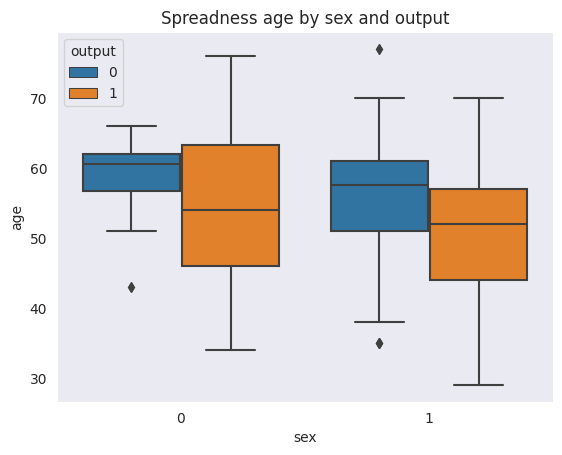

In [13]:
sns.boxplot(x='sex', y='age', data=df, hue='output')
plt.title('Spreadness age by sex and output')
plt.show()

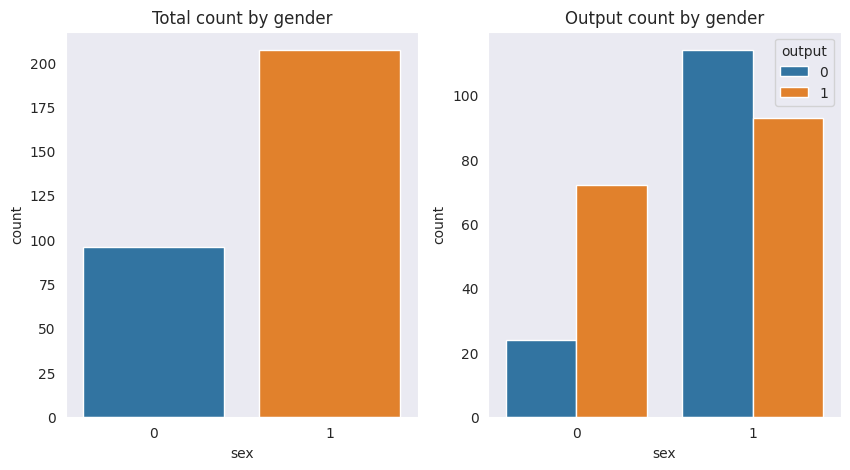

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1,)
sns.countplot(x='sex',data=df)
plt.title('Total count by gender')

plt.subplot(1,2,2)
sns.countplot(x='sex',data=df, hue='output')
plt.title('Output count by gender')
plt.show()

In [15]:
df['cp'].value_counts(normalize=True)*100

0    47.194719
2    28.712871
1    16.501650
3     7.590759
Name: cp, dtype: float64

In [42]:
df.groupby(['cp', 'output']).agg({'output':'count'})

output
cp output        
0  0          104
   1           39
1  0            9
   1           41
2  0           18
   1           69
3  0            7
   1           16

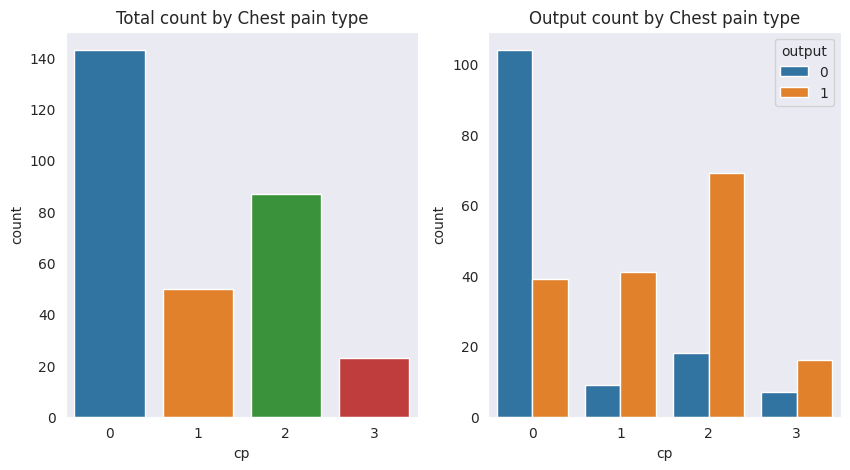

In [16]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='cp',data=df)
plt.title('Total count by Chest pain type')

plt.subplot(1,2,2)
sns.countplot(x='cp',data=df, hue='output')
plt.title('Output count by Chest pain type')
plt.show()

In [17]:
df['trtbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trtbps, dtype: float64

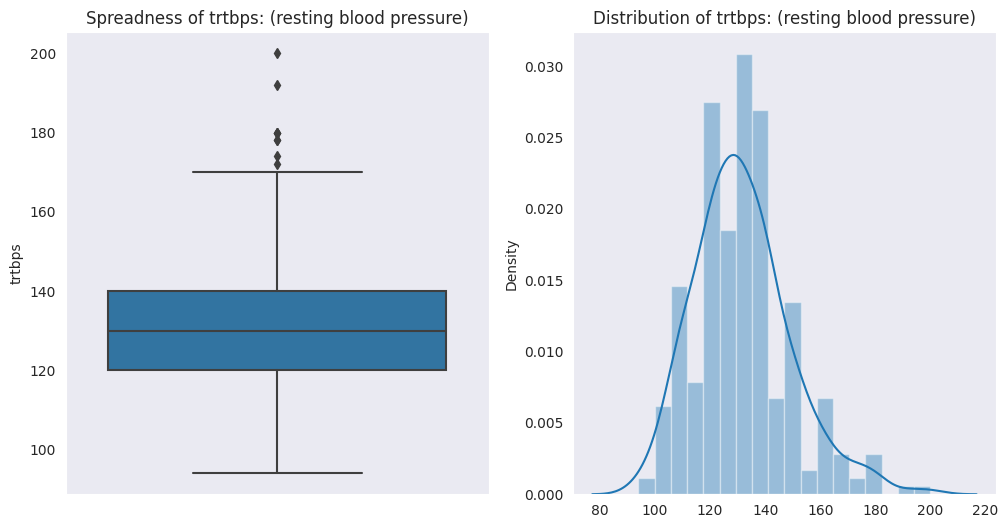

In [18]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(y=df['trtbps'])
plt.title('Spreadness of trtbps: (resting blood pressure)')

plt.subplot(1,2,2)
sns.distplot(x=df['trtbps'])
plt.title('Distribution of trtbps: (resting blood pressure)')
plt.show()


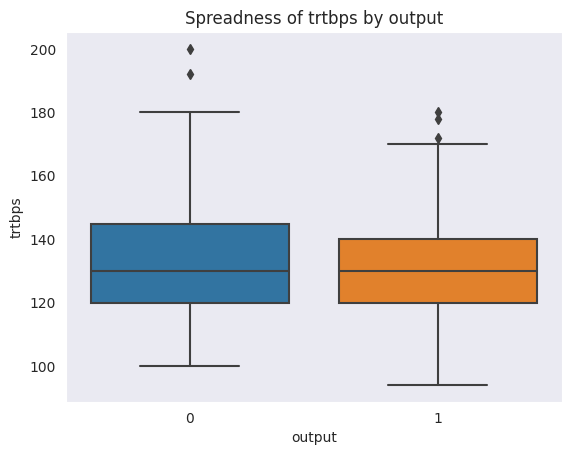

In [19]:
sns.boxplot(x='output', y='trtbps', data=df)
plt.title('Spreadness of trtbps by output')
plt.show()

In [20]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

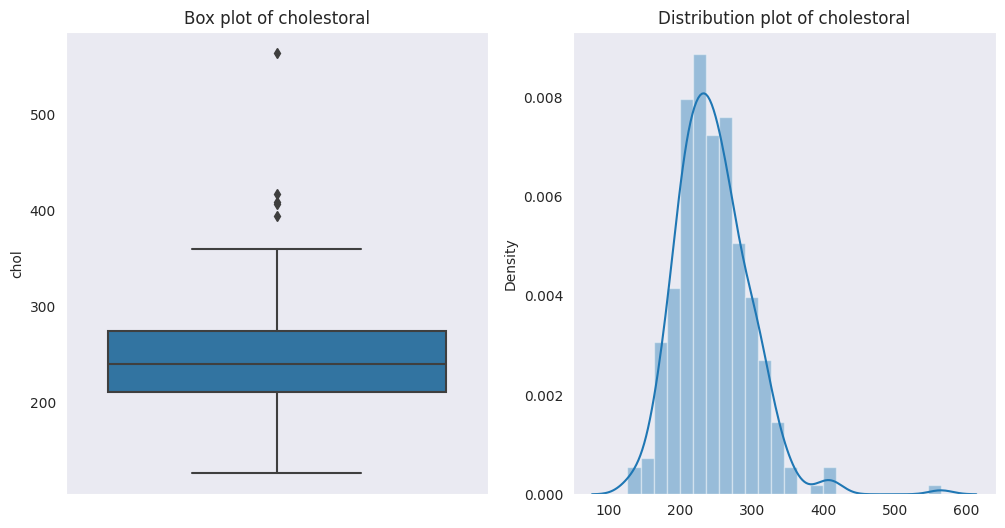

In [21]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(y=df['chol'])
plt.title('Box plot of cholestoral')

plt.subplot(1,2,2)
sns.distplot(x=df['chol'])
plt.title('Distribution plot of cholestoral')
plt.show()

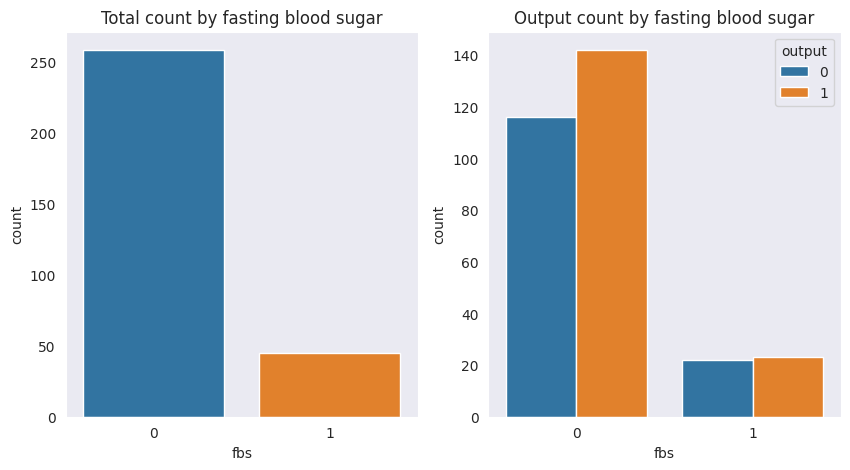

In [22]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1,)
sns.countplot(x='fbs',data=df)
plt.title('Total count by fasting blood sugar')

plt.subplot(1,2,2)
sns.countplot(x='fbs',data=df, hue='output')
plt.title('Output count by fasting blood sugar')
plt.show()

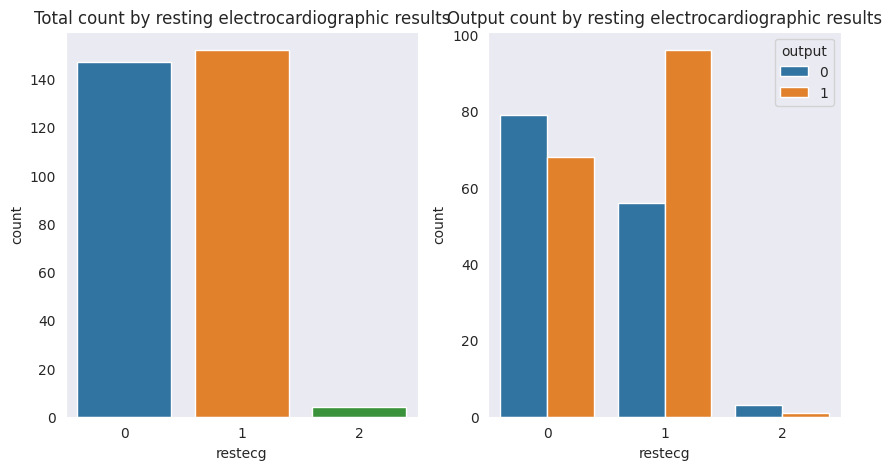

In [23]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1,)
sns.countplot(x='restecg',data=df)
plt.title('Total count by resting electrocardiographic results')


plt.subplot(1,2,2)
sns.countplot(x='restecg',data=df, hue='output')
plt.title('Output count by resting electrocardiographic results')
plt.show()

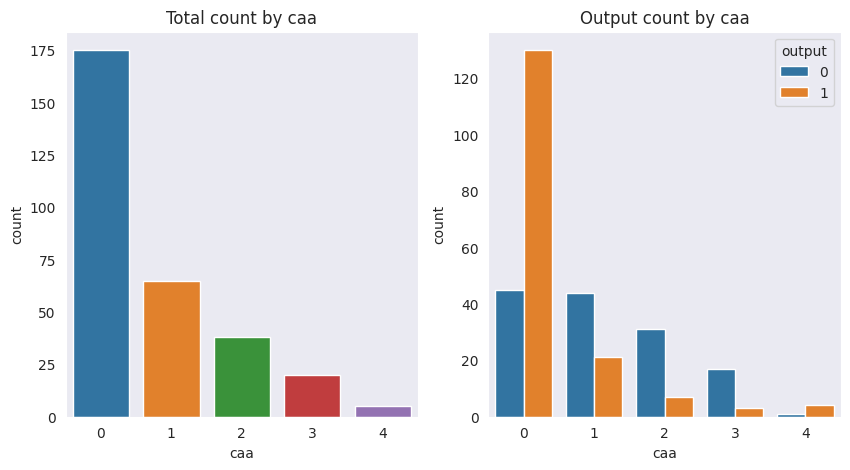

In [24]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1,)
sns.countplot(x='caa',data=df)
plt.title('Total count by caa')

plt.subplot(1,2,2)
sns.countplot(x='caa',data=df, hue='output')
plt.title('Output count by caa')
plt.show()


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [26]:
X = df.drop('output', axis=1)
y = df['output']

X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [29]:
clf.coef_

array([[ 9.54273805e-03, -1.21076918e+00,  7.76997578e-01,
        -1.19201709e-02, -1.43310744e-03, -8.90773886e-04,
         5.41311664e-01,  2.73964928e-02, -8.35662792e-01,
        -6.83333963e-01,  6.27611110e-01, -7.46974813e-01,
        -1.01502213e+00]])

In [30]:
clf.intercept_

array([0.02926502])

**Evaluate** **Logistic** **Regression** **model**

In [31]:
y_pred_train = clf.predict(X_train)

In [32]:
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1 Score: ', f1_score(y_train, y_pred_train))

Accuracy:  0.8553719008264463
Precision:  0.831081081081081
Recall:  0.924812030075188
F1 Score:  0.8754448398576512


In [33]:
y_pred = clf.predict(X_test)
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

**Results on the test data**

In [34]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Accuracy:  0.8852459016393442
Precision:  0.8787878787878788
Recall:  0.90625
F1 Score:  0.8923076923076922


In [35]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm

array([[25,  4],
       [ 3, 29]])

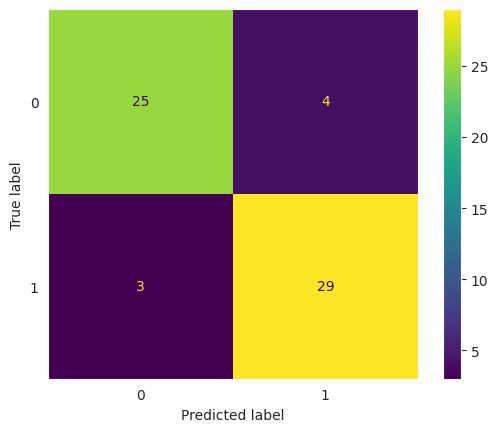

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot();

**Construct Decision Tree Model**

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=12)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=12)

**Evaluate Decision Tree Model**

**Performance on test data**

In [37]:
tree_y_pred = tree.predict(X_test)
tree_y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [38]:
print('Accuracy: ', accuracy_score(y_test, tree_y_pred))
print('Precision: ', precision_score(y_test, tree_y_pred))
print('Recall: ', recall_score(y_test, tree_y_pred))
print('F1 Score: ', f1_score(y_test, tree_y_pred))

Accuracy:  0.8360655737704918
Precision:  0.8928571428571429
Recall:  0.78125
F1 Score:  0.8333333333333334


**Confusion** **matrix**

In [40]:
cm = confusion_matrix(y_test, tree_y_pred, labels=tree.classes_)
cm

array([[26,  3],
       [ 7, 25]])

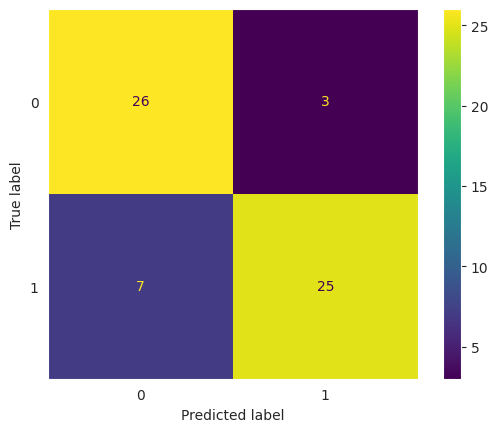

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot();

**Key Findings**

The results of the Logistic regression model on test data are:

**Accuracy:  88.52%**

**Precision:  87.87%**

**Recall:  90.62%**

**F1 Score:  89.23%**


The results of the Decision tree model on test data are:

**Accuracy:  83.60%**

**Precision:  89.28%**

**Recall:  78.12%**

**F1 Score:  83.33%**


These results clearly show that the Logistic Regression model outperforms the Decision Tree. As a result, we can predict a patient's likelihood of heart disease with an accuracy of **88.52%** based on the given features.